In [1]:
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist


## we import sklearn

In [3]:
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale


## t- SNE code in sklearn

In [11]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                   _kl_divergence)
import sklearn.utils.extmath

In [12]:
RS  = 20150101

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

In [18]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', 
               font_scale=1.5, rc={'lines.linewidth':2.5})

In [19]:
from moviepy.video.io.bindings import mplfig_to_npimage

In [20]:
import moviepy.editor as mpy

In [21]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [22]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

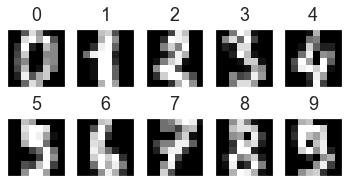

In [27]:
nrows, ncols = 2, 5
plt.figure(figsize=(6,3))
plt.gray()

for i in range(ncols*nrows):
    ax = plt.subplot(nrows, ncols, i+1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [30]:
X = np.vstack([digits.data[digits.target == i] for i in range(10)])
y = np.hstack([digits.target[digits.target == i] for i in range(10)])

In [43]:
len(digits_proj)

1797

In [31]:
digits_proj = TSNE(random_state=RS).fit_transform(X)

In [32]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(34.332893, 49.274147, '0'),
  Text(-1.319728, -15.458117, '1'),
  Text(-48.660706, -17.590935, '2'),
  Text(-38.25013, 19.84442, '3'),
  Text(34.050587, -39.90727, '4'),
  Text(7.20783, 21.457155, '5'),
  Text(49.78358, 2.491892, '6'),
  Text(-6.0275116, -48.48619, '7'),
  Text(-15.674105, -1.3951159, '8'),
  Text(-15.604521, 33.922512, '9')])

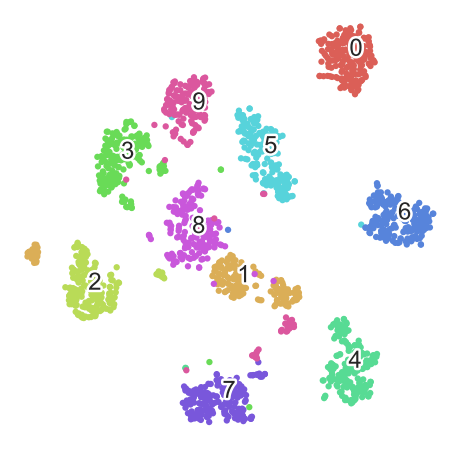

In [33]:
scatter(digits_proj, y)

In [46]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  3., ...,  4.,  0.,  0.],
       ...,
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  4., ...,  9.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.]])

In [53]:
y[1000]

5

In [55]:
X[1]

array([ 0.,  0.,  1.,  9., 15., 11.,  0.,  0.,  0.,  0., 11., 16.,  8.,
       14.,  6.,  0.,  0.,  2., 16., 10.,  0.,  9.,  9.,  0.,  0.,  1.,
       16.,  4.,  0.,  8.,  8.,  0.,  0.,  4., 16.,  4.,  0.,  8.,  8.,
        0.,  0.,  1., 16.,  5.,  1., 11.,  3.,  0.,  0.,  0., 12., 12.,
       10., 10.,  0.,  0.,  0.,  0.,  1., 10., 13.,  3.,  0.,  0.])

In [62]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [64]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])